# Naive Bayes classifier

In [10]:
import pandas as pd
from io import StringIO
import numpy as np
import pickle 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [11]:
with open('pickles/features_train.pkl', 'rb') as f:
    features_train = pickle.load(f)

with open('pickles/labels_train.pickle', 'rb') as f:
    labels_train = pickle.load(f)

with open('pickles/features_test.pkl', 'rb') as f:
    features_test = pickle.load(f)

with open('pickles/labels_test.pkl', 'rb') as f:
    labels_test = pickle.load(f)

In [12]:
multi_nb = MultinomialNB()
print(multi_nb.get_params)

<bound method BaseEstimator.get_params of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)>


In [13]:
multi_nb.fit(features_train, labels_train)
nb_pred = multi_nb.predict(features_test)

In [14]:
print('The training accuracy is:')
print(accuracy_score(multi_nb.predict(features_train), labels_train))

The training accuracy is:
0.9103857566765579


In [15]:
print('The testing accuracy is:')
print(accuracy_score(nb_pred, labels_test))


The testing accuracy is:
0.6563981042654028


In [16]:
print("classification report")
print(classification_report(nb_pred, labels_test))

classification report
              precision    recall  f1-score   support

           0       0.66      0.47      0.55        57
           1       0.56      0.83      0.67        30
           2       0.44      1.00      0.61         7
           3       0.75      0.59      0.66        41
           4       0.81      0.71      0.76        49
           5       0.68      0.76      0.71        33
           6       0.80      0.82      0.81        44
           7       0.66      0.49      0.56        51
           8       0.57      0.68      0.62        37
           9       0.50      0.51      0.51        37
          10       0.67      0.81      0.73        36

    accuracy                           0.66       422
   macro avg       0.64      0.70      0.65       422
weighted avg       0.67      0.66      0.65       422



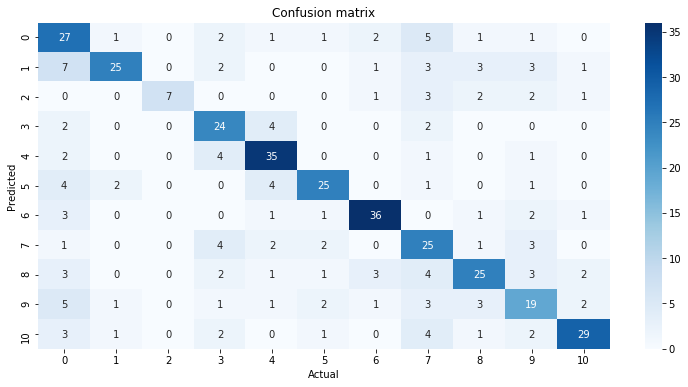

In [17]:
conf_matrix = confusion_matrix(labels_test, nb_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

We get a macro F1-score of 0.65